In [6]:
!pip install canaro caer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.5/809.5 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 86.1 MB/s eta 0:00:00


In [7]:
import cv2 as cv
import caer
import canaro
import numpy as np
import gc
import os

In [63]:
IMG_SIZE=(225,225)
channels= 1
char_path=r'drive/MyDrive/the-simpsons-characters-dataset/simpsons_dataset'

In [64]:
char_dict = {}

for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path, char)))


char_dict = caer.sort_dict(char_dict, descending = True)

char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('simpsons_dataset', 42),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('gil', 27),
 ('fat_

In [65]:
char_dict = {}

for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path, char)))

# Sortin in descending order
char_dict = caer.sort_dict(char_dict, descending = True)

char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('simpsons_dataset', 42),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('gil', 27),
 ('fat_

In [66]:
characters = []
count = 0

for i in char_dict:
    characters.append(i[0])
    count += 1

    if count >= 10:
        break

characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [67]:
train = caer.preprocess_from_dir(char_path, characters, channels=channels,
                                 IMG_SIZE = IMG_SIZE, isShuffle = True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 0.03948020935058594s
[INFO] At 1000 files
[INFO] 1454 files found in 0.023718595504760742s
[INFO] At 1000 files
[INFO] 1452 files found in 0.023436546325683594s
[INFO] At 1000 files
[INFO] 1354 files found in 0.02403879165649414s
[INFO] At 1000 files
[INFO] 1342 files found in 0.02063155174255371s
[INFO] At 1000 files
[INFO] 1291 files found in 0.054880380630493164s
[INFO] At 1000 files
[INFO] 1206 files found in 0.03759264945983887s
[INFO] At 1000 files
[INFO] 1194 files found in 0.02150726318359375s
[INFO] At 1000 files
[INFO] 1193 files found in 0.021083354949951172s
[INFO] At 1000 files
[INFO] 1079 files found in 0.01821756362915039s
----------------------------------------------
[INFO] 13811 files preprocessed! Took 3m 28s


In [69]:
len(train)

13811

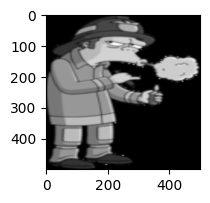

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize = (2,2))
plt.imshow(train[0][0], cmap = 'gray')
plt.show()

In [71]:
featureSet, labels = caer.sep_train(train,IMG_SIZE = IMG_SIZE)

In [ ]:
from tensorflow.keras.utils import to_categorical

# Normalize the featureset ---> (0.1)

featureSet = caer.normalize(featureSet)
labels = to_categorical(labels, len(characters))

In [1]:
x_train, x_val, y_train, y_val = caer.train_val_split(featureSet, labels, val_ratio = 0.2)

NameError: name 'caer' is not defined

In [17]:
del featureSet
del train
del labels

gc.collect()

0

In [18]:
BATCH_SIZE = 16
EPOCHS = 26

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of the ImageDataGenerator with specified augmentations
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2
)

# Flow the training data through the generator
train_gen = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

In [20]:
import tensorflow as tf
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Input, Dropout

def create_ST_layer(input_shape=(225, 225, 1)):
    input_img = Input(shape=input_shape)
    model = Conv2D(512, kernel_size=(7, 7), input_shape=input_shape, strides=(1, 1), activation="relu")(input_img)
    model = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(model)
    model = Conv2D(512, kernel_size=(7, 7), strides=(1, 1), activation="sigmoid")(model)
    model = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(model)
    model = Conv2D(512, kernel_size=(7, 7), strides=(1, 1), activation="relu")(model)
    model = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(model)
    model = Conv2D(512, kernel_size=(7, 7), strides=(1, 1), activation="sigmoid")(model)
    model = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(model)

    model = Flatten()(model)
    model = Dense(512, activation="relu")(model)
    model = Dropout(0.5)(model)
    model = Dense(512, activation="relu")(model)
    model = Dropout(0.5)(model)
    model = Dense(6, activation="sigmoid")(model)

    model = tf.keras.Model(inputs=input_img, outputs=model)
    return model

# Print the model summary
model = create_ST_layer()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 225, 225, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 219, 219, 512)       │          25,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 109, 109, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 103, 103, 512)       │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 51, 51, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 512)         │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 512)         │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      16,777,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,605,766 (212.12 MB)

 Trainable params: 55,605,766 (212.12 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
from tensorflow.keras.callbacks import LearningRateScheduler
callbacks_list=[LearningRateScheduler(canaro.lr_schedule)]

In [22]:
from tensorflow.keras.optimizers import SGD

# Assuming you have the necessary data and model defined
# ...

# Create the SGD optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0000001, decay=1e-7, momentum=0.7, nesterov=True)


# Compile the model with the optimizer and loss function
model.compile(optimizer, loss='binary_crossentropy')

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

model = Sequential()

# Adjust the input shape in the first layer based on your data
height=225
width=225
channels = 1 # Get the value from the global variables
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(height, width, channels), activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='sigmoid'))

# Create a new optimizer for the new model
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0000001, decay=1e-7, momentum=0.7, nesterov=True)

# Compile the model with the new optimizer and loss function
model.compile(optimizer, loss='binary_crossentropy', metrics=['accuracy'])

training=model.fit(train_gen, steps_per_epoch=len(x_train)//BATCH_SIZE,
                   epochs=EPOCHS, validation_data=(x_val, y_val),
                   validation_steps=len(y_val)//BATCH_SIZE, callbacks=callbacks_list)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/26


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


690/690 ━━━━━━━━━━━━━━━━━━━━ 64s 83ms/step - accuracy: 0.1626 - loss: 0.3349 - val_accuracy: 0.2598 - val_loss: 0.2984 - learning_rate: 0.0100
Epoch 2/26
  1/690 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.1875 - loss: 0.3117

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1875 - loss: 0.3117 - val_accuracy: 0.2656 - val_loss: 0.3008 - learning_rate: 0.0100
Epoch 3/26
690/690 ━━━━━━━━━━━━━━━━━━━━ 52s 74ms/step - accuracy: 0.2576 - loss: 0.3043 - val_accuracy: 0.3101 - val_loss: 0.2908 - learning_rate: 0.0100
Epoch 4/26
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1875 - loss: 0.3109 - val_accuracy: 0.3057 - val_loss: 0.2926 - learning_rate: 0.0100
Epoch 5/26
690/690 ━━━━━━━━━━━━━━━━━━━━ 77s 69ms/step - accuracy: 0.2868 - loss: 0.2980 - val_accuracy: 0.3216 - val_loss: 0.2892 - learning_rate: 0.0100
Epoch 6/26
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5000 - loss: 0.2785 - val_accuracy: 0.3122 - val_loss: 0.2901 - learning_rate: 0.0100
Epoch 7/26
690/690 ━━━━━━━━━━━━━━━━━━━━ 81s 70ms/step - accuracy: 0.2956 - loss: 0.2961 - val_accuracy: 0.2880 - val_loss: 0.2904 - learning_rate: 0.0100
Epoch 8/26
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1875 - loss: 0.3371 - val_a

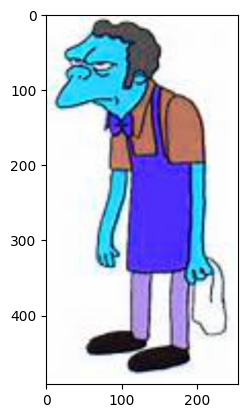

In [59]:
#데이터 베이스의 원하는 사진을 입력하세요
test_path = r'drive/MyDrive/the-simpsons-characters-dataset/simpsons_dataset/moe_szyslak/pic_0123.jpg'

img = cv.imread(test_path)

plt.imshow(img)
plt.show()

In [60]:
def prepare(image):
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = cv.resize(image, IMG_SIZE)
    image = caer.reshape(image, IMG_SIZE, 1)
    return image

In [61]:
predictions = model.predict(prepare(img))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [62]:
print(characters[np.argmax(predictions[0])])

moe_szyslak
